<h1>Space X Falcon 9 First Stage Landing Prediction</h1>

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


## Objectives

Perform exploratory Data Analysis and determine Training Labels

create a column for the class

Standardize the data

Split into training data and test data

-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression


Find the method performs best using test data

## Import Libraries and Define Auxiliary Functions


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [16]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [17]:
y = data["Class"].to_numpy()

In [18]:
print(data.columns.tolist())

['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']


## TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [22]:
X = data.drop(columns=['Class','Outcome'])
# 1. Convert Date to Year (StandardScaler can't handle date objects)
X['Date'] = pd.to_datetime(X['Date']).dt.year

# 2. One-Hot encoding
X = pd.get_dummies(X)

# 3. Scaling the date with StandardScaler()
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

## TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
y_test.shape

(18,)

## TASK  4

Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [25]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [26]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)

In [27]:
logreg_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [28]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8111111111111111


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [29]:
logreg_cv.score(X_test, y_test)

0.9444444444444444

Let's look at the confusion matrix:


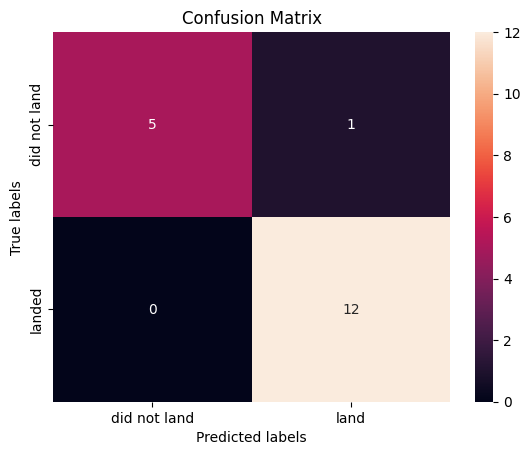

In [31]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

NOTE: As we can see, I have a different number of false positives here from those provided on the course. 

## TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [37]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()


In [41]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [42]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.03162277660168379), 'gamma': np.float64(0.001), 'kernel': 'linear'}
accuracy : 0.8111111111111111


In [76]:
# Manually test Sigmoid to see if it hits the same accuracy score
test_svm = SVC(kernel='sigmoid', C=0.01, gamma=0.01)
test_svm.fit(X_train, y_train)
print(test_svm.score(X_test, y_test))

0.6666666666666666


## TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:


In [43]:
svm_cv.score(X_test, y_test)

0.9444444444444444

We can plot the confusion matrix


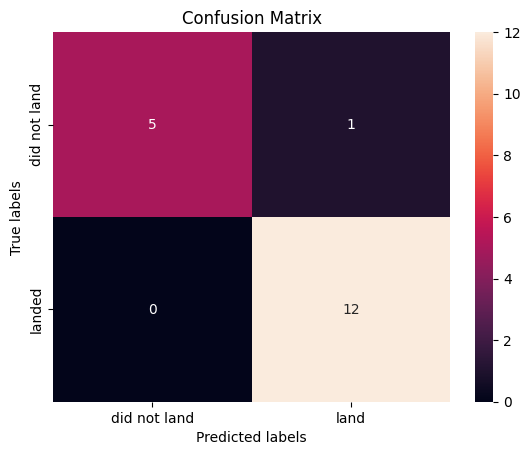

In [45]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [72]:
parameters = {
    'criterion': ['gini', 'entropy'], # Removed 'mae' or 'mse' which often cause the crash
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt'], # 'auto' is deprecated and can cause failures
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

parameters_test = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5], # Limit depth to prevent overfitting
    'min_samples_leaf': [5], # Require more samples per leaf
    'splitter': ['best']
}

tree = DecisionTreeClassifier()

In [71]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [68]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'splitter': 'best'}
accuracy : 0.8111111111111111


## TASK  9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [69]:
tree_cv.score(X_test, y_test)

0.9444444444444444

We can plot the confusion matrix


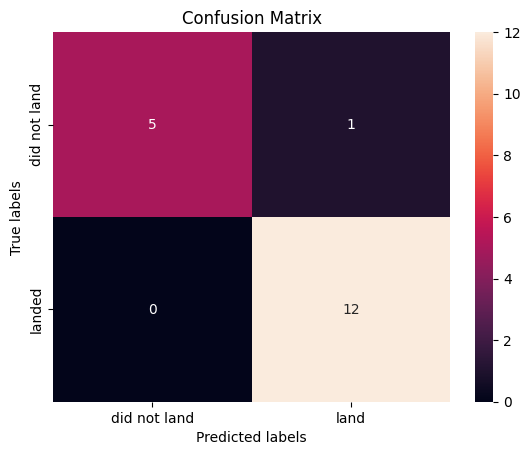

In [70]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [64]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [53]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [54]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8


## TASK  11

In [56]:
knn_cv.score(X_test, y_test)

0.9444444444444444

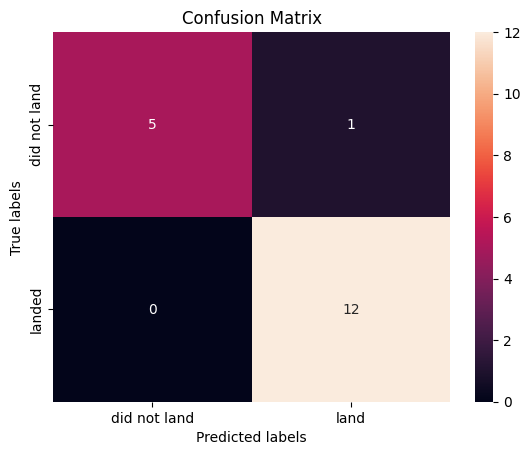

In [57]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK 12